# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

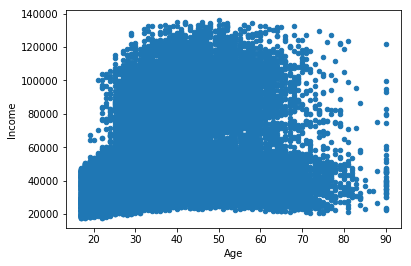

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

__What is the relation between the age and Income?__


No existe un patrón que defina una relación clara entre el ingreso y la edad aunque si se pueden deducir que entre los 23 y los 70 años se encuentran concentrados los casos con los ingresos mas altos y desde los 65 años parece haber una concentración de casos con ingresos menores a los 60 mil y las observaciones mayores a este valor se hacen mas escasas. Entre los 80 y 90 no se ven muchas observaciones siendo 100 mil unidades de ingreso la mayor reportada en este rango. 

__For a one percent increase in the Age how much the income increases?__



In [4]:
from sklearn.linear_model import LinearRegression

clf1 = LinearRegression()
clf1.fit(income[['Age']], income['Income'])
clf1.coef_

array([542.16765707])

__Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years__

Ingreso cuando la  edad es 30 usando LinearRegression : 48803.12
Ingreso cuando la  edad es 30 usando SGDRegressor: 52253.63
Ingreso cuando la  edad es 40 usando LinearRegression: 54224.79
Ingreso cuando la  edad es 40 usando SGDRegressor: 58831.45


Text(0.5,1,'Ingreso entre 30 y 40 años')

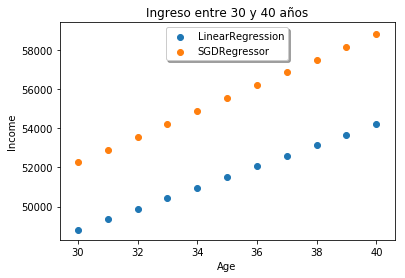

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

clf1 = LinearRegression()
clf2 = SGDRegressor( max_iter=10000,tol=None)

clf1.fit(income[['Age']], income['Income'])
clf2.fit(income[['Age']], income['Income'])

x = np.arange(30, 41, 1)


y_pred = clf1.predict(30)
print("Ingreso cuando la  edad es 30 usando LinearRegression : " + str(np.round(y_pred[0],2)))

y_pred = clf2.predict(30)
print("Ingreso cuando la  edad es 30 usando SGDRegressor: " + str(np.round(y_pred[0],2)))

y_pred = clf1.predict(40)
print("Ingreso cuando la  edad es 40 usando LinearRegression: " + str(np.round(y_pred[0],2)))

y_pred = clf2.predict(40)
print("Ingreso cuando la  edad es 40 usando SGDRegressor: " + str(np.round(y_pred[0],2)))

y_pred = clf1.predict(x.reshape(-1,1))
y_pred2 = clf2.predict(x.reshape(-1,1))

plt.scatter(x, y_pred)
plt.scatter(x, y_pred2)
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(['LinearRegression','SGDRegressor'],loc='upper center', shadow=True)
plt.title('Ingreso entre 30 y 40 años')

# Exercise 4.2
Evaluate the model using the MSE

In [6]:
from sklearn import metrics
y_pred = clf1.predict(income[['Age']])
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred))
MSE1 = metrics.mean_squared_error(income['Income'], y_pred)

MSE: 593783043.8402297



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [7]:
income['Age2'] = income['Age']**2 
Y = income['Income']
X = income[['Age', 'Age2']].values
X[0:5]

array([[  39, 1521],
       [  50, 2500],
       [  38, 1444],
       [  53, 2809],
       [  28,  784]], dtype=int64)

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

(array([  38.58164676, 1674.59915236]), array([  13.64022309, 1179.02941609]))

In [9]:
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples),X]
betas = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, Y))
betas

array([ 53455.8091582 ,  42718.04340395, -36011.57934338])

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [10]:
income.columns
clf1.fit(income[['Age','Hours per week','Capital Loss','Capital Gain']], income['Income'])
y_pred = clf1.predict(income[['Age','Hours per week','Capital Loss','Capital Gain']])

print('MSE:', metrics.mean_squared_error(income['Income'], y_pred))
MSE2 =  metrics.mean_squared_error(income['Income'], y_pred)
print (min(MSE1,MSE2))

MSE: 518699084.217675
518699084.217675


__R:/__ Al incorporar mas variables dentro del modelo la medida del error cuadrático medio (MSE) disminuye 

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [11]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [12]:
data.head(11)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


__Create Y and X__

Tomando los datos de la columna _Churn?_ y haciendo la conversión a variable dummy estos datos serán la variable Y. Para la variable X escogí la columna _Day Mins_ 


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
 
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')
data['Churn?'] = (data['Churn?'] == 'True.').astype('int')
data['VMail Plan'] = (data['VMail Plan'] == 'yes').astype('int')
data["Int'l Plan"] = (data["Int'l Plan"] == 'yes').astype('int')


Y = data['Churn?']
X = data[["Day Mins","VMail Plan","Int'l Plan"]]

__What is the distribution of the churners?__

Text(0,0.5,'Churn')

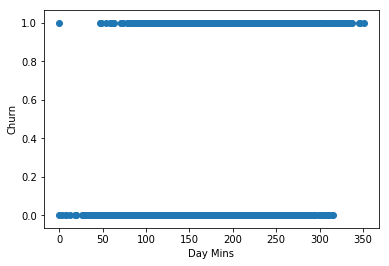

In [14]:
plt.scatter(X[['Day Mins']], Y)
plt.xlabel('Day Mins')
plt.ylabel('Churn')

Tomando únicamente la variable _Day Mins_ No es clara la distribución pero se puede afirmar que el Churn empieza a ser notable cuando el número de minutos diurnos es superior a los 50 y que no hay Churn cuando el número de minutos diurnos es inferior a 325.

__Split the data in train (70%) and test (30%)__

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

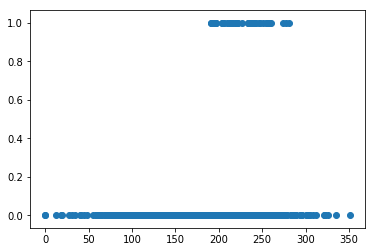

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
logreg.fit(X_train, Y_train.values)


y_predict = logreg.predict(X_test)
y_predict

# plot the class predictions
plt.scatter(X_test[["Day Mins"]], y_predict)


# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_predict)
print(confusion_matrix)

[[838  19]
 [122  21]]


The result is telling us that we have 838+21 correct predictions and 19+122 incorrect predictions.

In [18]:
#y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.86
